<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework2Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
# load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sparab2/MachineLearning/main/diabetes.csv')

In [43]:
# separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [44]:
class LogisticRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        # Initializing the weights and the bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent algorithm
        for i in range(self.max_iter):
            # Calculate the linear combination of weights and features
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply the sigmoid function to get the predicted probabilities
            y_pred = self.sigmoid(linear_model)
            
            # Compute the gradient of the loss function with respect to the weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def predict(self, X):
        # Calculate the linear combination of weights and features
        linear_model = np.dot(X, self.weights) + self.bias
        
        # Apply the sigmoid function to get the predicted probabilities
        y_pred = self.sigmoid(linear_model)
        
        # Convert the probabilities to binary predictions
        y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
        
        return y_pred_binary

In [45]:
# scale and standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

In [46]:
# create k-fold cross-validation objects
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

In [47]:
# initialize variables to store performance metrics
acc_scores_5 = []
prec_scores_5 = []
rec_scores_5 = []
conf_matrices_5 = []

acc_scores_10 = []
prec_scores_10 = []
rec_scores_10 = []
conf_matrices_10 = []

In [48]:
# train and evaluate for k=5
for train_index, test_index in kf5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train the model
    model = LogisticRegressionGradientDescent(learning_rate=0.01, max_iter=100)
    model.fit(X_train, y_train)

    # make predictions on test set
    y_pred = model.predict(X_test)

    # calculate performance metrics
    acc_scores_5.append(accuracy_score(y_test, y_pred))
    prec_scores_5.append(precision_score(y_test, y_pred))
    rec_scores_5.append(recall_score(y_test, y_pred))
    conf_matrices_5.append(confusion_matrix(y_test, y_pred))


In [49]:
# calculate average performance metrics for k=5
avg_acc_5 = sum(acc_scores_5) / len(acc_scores_5)
avg_prec_5 = sum(prec_scores_5) / len(prec_scores_5)
avg_rec_5 = sum(rec_scores_5) / len(rec_scores_5)
avg_conf_5 = sum(conf_matrices_5) / len(conf_matrices_5)

In [50]:
print("K=5 results:")
print("Average accuracy:", avg_acc_5)
print("Average precision:", avg_prec_5)
print("Average recall:", avg_rec_5)
print("Average confusion matrix:\n", avg_conf_5)

K=5 results:
Average accuracy: 0.7513199219081572
Average precision: 0.6524455782312926
Average recall: 0.6271837239892277
Average confusion matrix:
 [[82.  18. ]
 [20.2 33.4]]


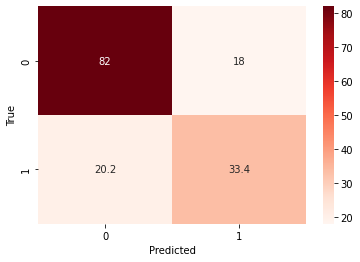

In [51]:
# plot the confusion matrix for K=5 as a heatmap
sns.heatmap(avg_conf_5, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
# train and evaluate for k=10
for train_index, test_index in kf10.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train the model
    model = LogisticRegressionGradientDescent(learning_rate=0.01, max_iter=100)
    model.fit(X_train, y_train)

    # make predictions on test set
    y_pred = model.predict(X_test)

    # calculate performance metrics
    acc_scores_10.append(accuracy_score(y_test, y_pred))
    prec_scores_10.append(precision_score(y_test, y_pred))
    rec_scores_10.append(recall_score(y_test, y_pred))
    conf_matrices_10.append(confusion_matrix(y_test, y_pred))

In [53]:
# calculate average performance metrics for k=10
avg_acc_10 = sum(acc_scores_10) / len(acc_scores_10)
avg_prec_10 = sum(prec_scores_10) / len(prec_scores_10)
avg_rec_10 = sum(rec_scores_10) / len(rec_scores_10)
avg_conf_10 = sum(conf_matrices_10) / len(conf_matrices_10)

In [54]:
print("K=10 results:")
print("Average accuracy:", avg_acc_10)
print("Average precision:", avg_prec_10)
print("Average recall:", avg_rec_10)
print("Average confusion matrix:\n", avg_conf_10)

K=10 results:
Average accuracy: 0.7525290498974709
Average precision: 0.6500708180708181
Average recall: 0.6243957082344179
Average confusion matrix:
 [[41.   9. ]
 [10.  16.8]]


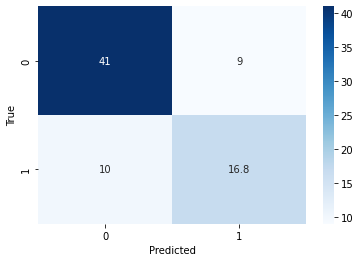

In [55]:
# plot the confusion matrix for K=10 as a heatmap
sns.heatmap(avg_conf_10, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()